In [3]:

from sklearn.utils import shuffle
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib as plt

data = pd.read_parquet("new.parquet")

In [ ]:
# ============= mapa ser mais defesa ou ataque (winrole) =============



collum = np.zeros(data["mapname"].unique().size)
attacker_win_per_map = pd.DataFrame(columns=["map", "percentage"])

for map in data["mapname"].unique():
    map_info = data.query("mapname == '" + (str)(map) + "'")["winrole"]
    values = np.zeros(1000)
    for i in range(1000):
        sample = shuffle(map_info)[:30]
        attacker_win = sample.value_counts()["Attacker"]
        values[i] = attacker_win / 30
        attacker_win_per_map.loc[len(attacker_win_per_map)] = [map, values[i]]
    
    print("Map: " + map)
    print(
        "CI: "
        + (str)(
            stats.t.interval(
                0.95,
                df=len(values) - 1,
                loc=np.mean(values),
                scale=np.std(values, ddof=1) / np.sqrt(len(values)),
            )
        )
    )
    print("")


Map: CLUB_HOUSE
CI: (np.float64(0.5002308160169004), np.float64(0.5113691839830994))

Map: PLANE
CI: (np.float64(0.466776114864881), np.float64(0.47855721846845223))

Map: KANAL
CI: (np.float64(0.48615070731636595), np.float64(0.4975826260169674))

Map: HEREFORD_BASE
CI: (np.float64(0.48034794921964297), np.float64(0.4915187174470237))

Map: CONSULATE
CI: (np.float64(0.4824801703734748), np.float64(0.49358649629319185))

Map: YACHT
CI: (np.float64(0.4964138778442523), np.float64(0.5077861221557477))



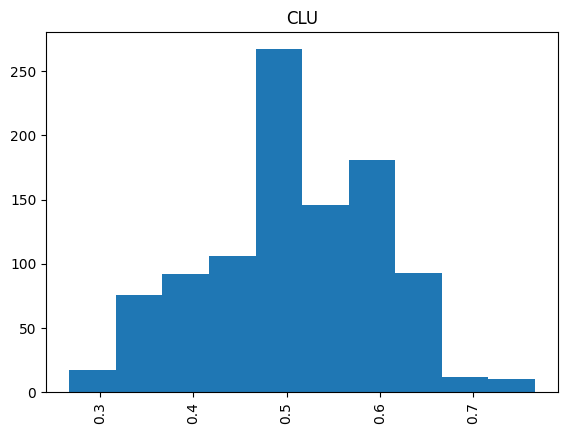

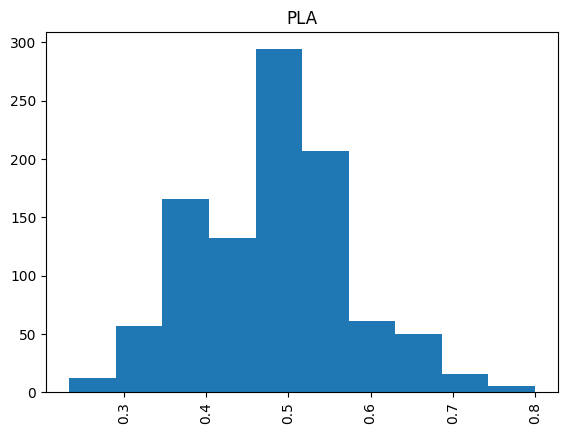

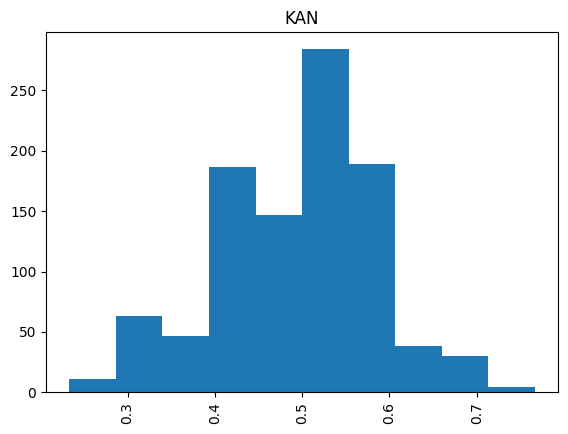

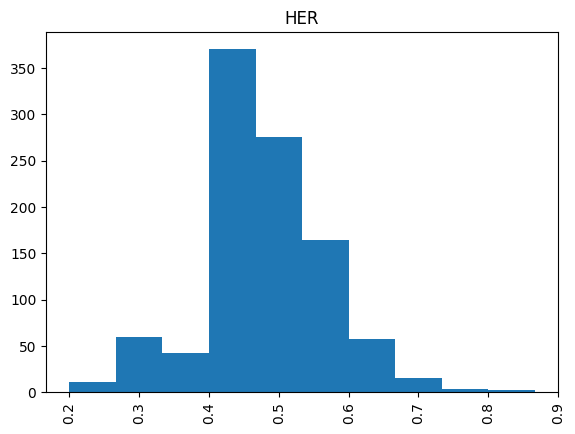

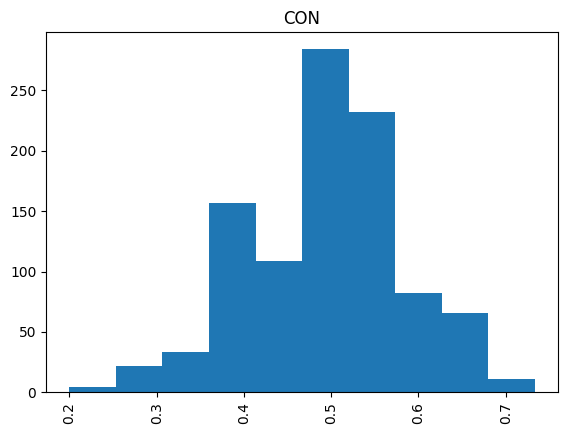

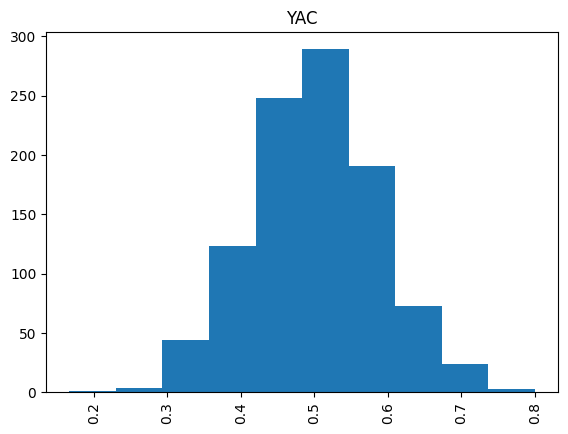

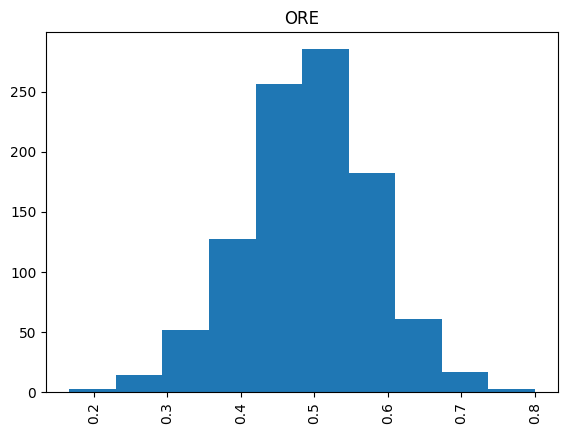

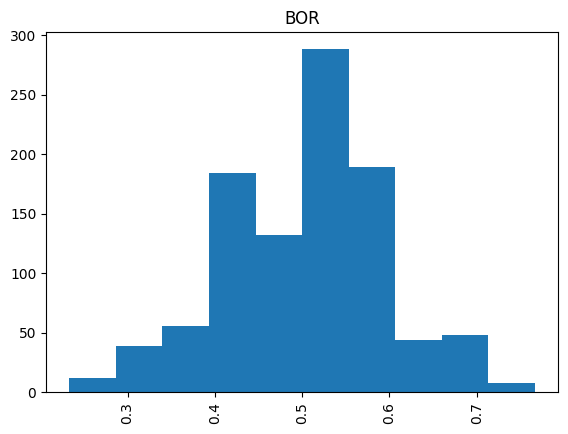

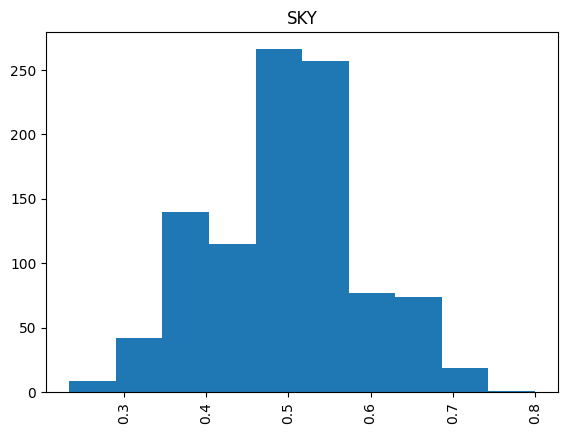

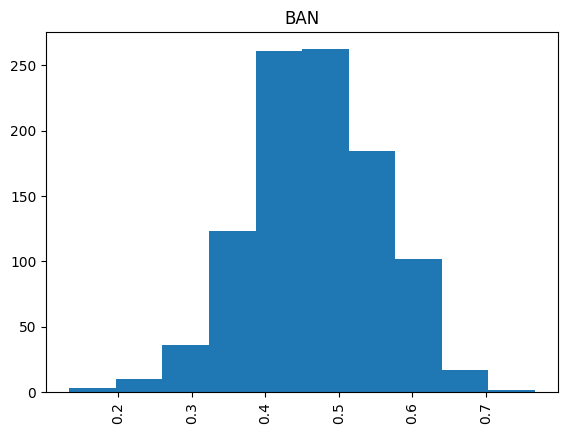

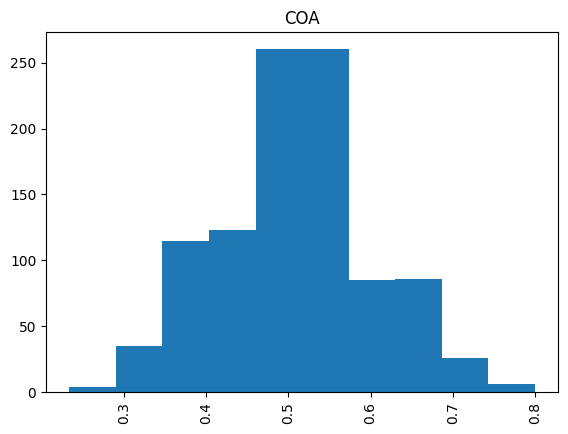

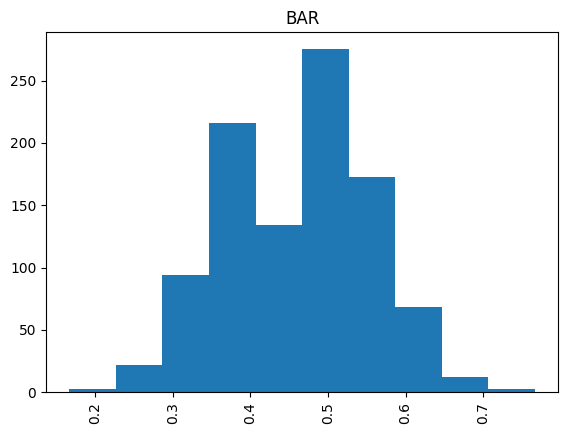

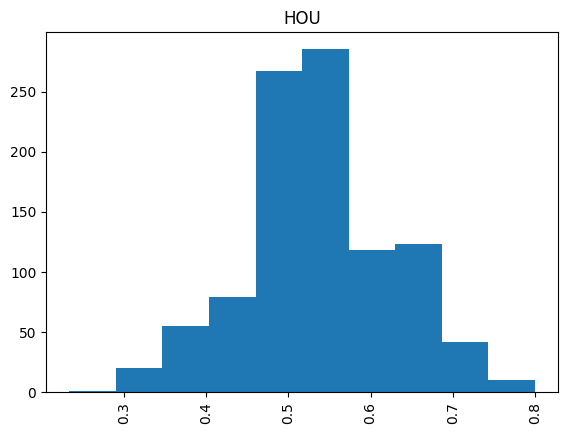

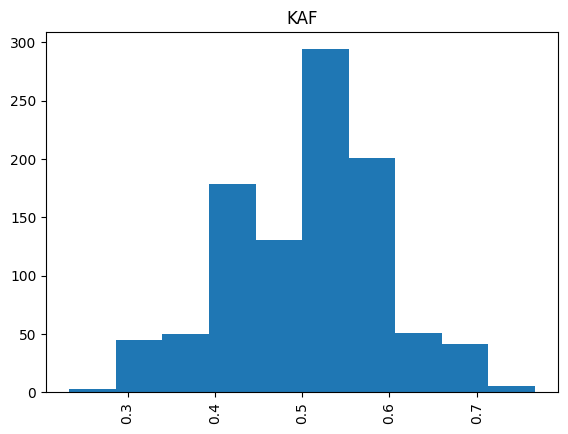

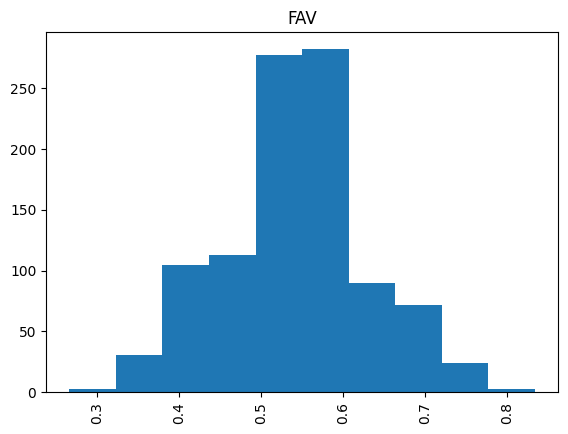

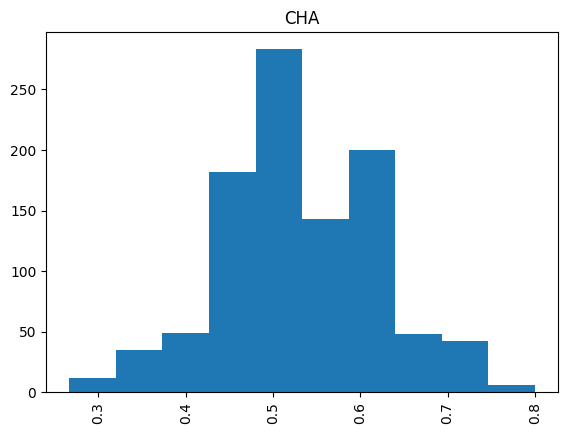

In [5]:
for map in attacker_win_per_map["map"].unique():
    attacker_win_per_map.query("map == '" + map + "'").hist(column="percentage", by="map", grid=False)

## Influencia do Mapa no lado vencedor


  Idealmente, os atacantes deveriam vencer 50% das vezes. Mapas que não cumprem essa média significam que eles favorecem um lado acima do outro.

  Para verificar os mapas que favorecem um lado, usamos o teste da permutação para verificar em média quantas vitórias os atacantes tiveram por mapa.

  O intervalo de confiança calculado nos garante que se O valor de 50% estiver no IC, então o mapa é equilibrado (não favorece um lado).

- Atacantes Favorecidos: COASTLINE, HOUSE, FAVELAS, CHALET
- Equilibrados: CLUB_HOUSE, YACHT, BORDER, SKYSCRAPER, BARTLETT_U, KAFE_DOSTOYEVSKY
- Defensores Favorecidos: PLANE, KANAL, HEREFORD_BASE, CONSULATE, OREGON, BANK, 